Parametri ottimizzati:
Kp = 100.280, Ki = 109.005, Kd = 100.034


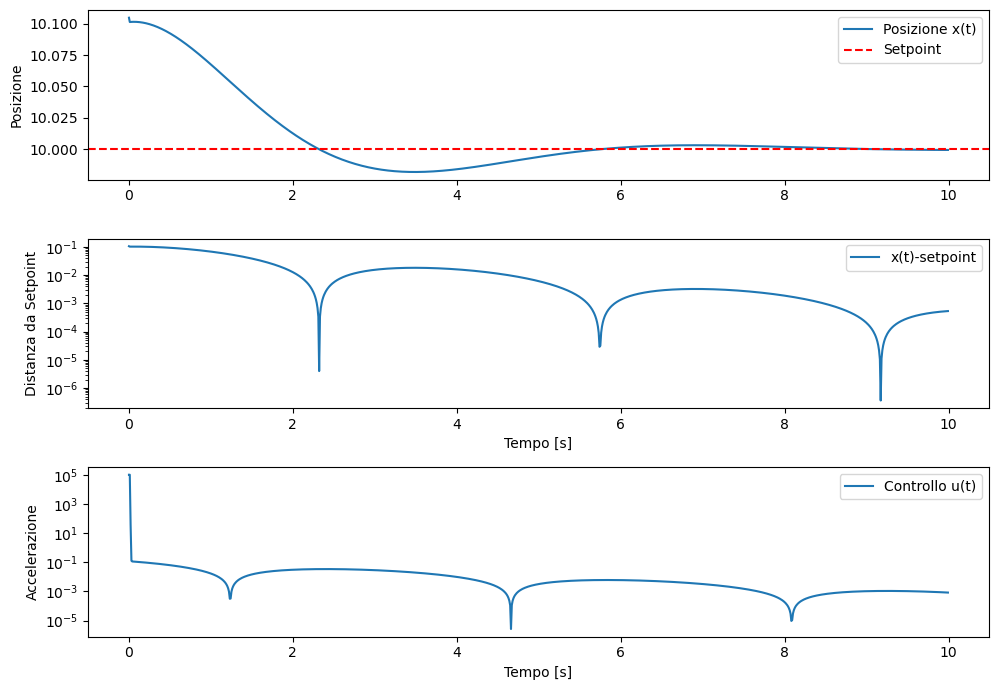

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

dt = 0.01        # passo temporale (s)
T  = 10          # durata simulazione (s)
N  = int(T / dt)
# Stato iniziale del sistema
x0 = 0           # posizione
v0 = 0           # velocità
# Obiettivo
setpoint = 10    # vogliamo che x arrivi a 10

def simulate_pid(K, setpoint=setpoint, T=T, dt=dt, x0=x0, v0=v0):
    Kp, Ki, Kd = K
    N = int(T / dt)
    X = x0
    V = v0
    error_sum = 0
    prev_error = 0
    integral = 0
    cost = 0
    for _ in range(N):
        error = setpoint - X
        integral += error * dt
        derivative = (error - prev_error) / dt
        U = Kp * error + Ki * integral + Kd * derivative
        prev_error = error
        # Simula sistema
        V += U * dt
        X += V * dt
        cost += error**2  # somma dell'errore quadrato
    return cost  # da minimizzare
# Limiti e valori iniziali
bounds = [(0, 20), (0, 20), (0, 20)]
result = minimize(simulate_pid, x0=[1, 0.1, 0.01])#, bounds=bounds)
print("Parametri ottimizzati:")
print(f"Kp = {result.x[0]:.3f}, Ki = {result.x[1]:.3f}, Kd = {result.x[2]:.3f}")

# PID gains
Kp = result.x[0]
Ki = result.x[1]
Kd = result.x[2]
# Variabili PID
integral = 0
prev_error = 0
# Per plotting
xs = np.zeros((N),dtype=float)
us = np.zeros((N),dtype=float)
times = np.zeros((N),dtype=float)
# Simulazione
x = x0
v = v0
for i in range(N):
    t = i * dt
    error = setpoint - x
    integral += error * dt
    derivative = (error - prev_error) / dt
    u = Kp * error + Ki * integral + Kd * derivative
    prev_error = error
    # Aggiorna dinamica del sistema
    a = u
    v += a * dt
    x += v * dt
    # Salva per grafico
    xs[i] = x
    us[i] = u
    times[i] = t

# Plot
plt.figure(figsize=(10, 7))
plt.subplot(3, 1, 1)
plt.plot(times, xs, label='Posizione x(t)')
plt.axhline(setpoint, color='r', linestyle='--', label='Setpoint')
plt.ylabel("Posizione")
plt.legend()
plt.subplot(3, 1, 2)
plt.semilogy(times, np.abs(xs-setpoint), label='x(t)-setpoint')
plt.xlabel("Tempo [s]")
plt.ylabel("Distanza da Setpoint")
plt.legend()
plt.subplot(3, 1, 3)
plt.semilogy(times, np.abs(us), label='Controllo u(t)')
plt.xlabel("Tempo [s]")
plt.ylabel("Accelerazione")
plt.legend()
plt.tight_layout()
